In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()

In [4]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

In [5]:
df_hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
df_hotels = df_hotels.reset_index().rename(columns={'index': 'id'})
#df_hotels = df_hotels.drop(columns='id')
df_hotels

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
#Create a function with one argument formed in DataFrame to check the data type, the number of null values, 
#the percentage of null values and the number of unique values for each column!
def question_1(df):
    data = []
    for column in df.columns:
        data.append({
            'data feature': column,
            'data type': df[column].dtype,
            'nulls': df[column].isnull().sum(),
            'nulls (%)': round((df[column].isnull().mean() * 100),5),
            'unique_value': df[column].nunique(),
        })
    return pd.DataFrame(data)

question_1(df_hotels)

,data feature,data type,nulls,nulls (%),unique_value
0,id,int64,0,0.00000,119390
1,hotel,object,0,0.00000,2
2,is_canceled,int64,0,0.00000,2
3,lead_time,int64,0,0.00000,479
4,arrival_date_year,int64,0,0.00000,3
5,arrival_date_month,object,0,0.00000,12
6,arrival_date_week_number,int64,0,0.00000,53
7,arrival_date_day_of_month,int64,0,0.00000,31
8,stays_in_weekend_nights,int64,0,0.00000,17
9,stays_in_week_nights,int64,0,0.00000,35


In [8]:
#How many visitors are there who cancel the reservation and who don’t? 
#And from that number draw conclusions about the proportions of each!

df_hotels.is_canceled.value_counts(normalize=True)
#df_hotels.previous_cancellations.value_counts()  # proportion of adults
#proportion of canceled reservations


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

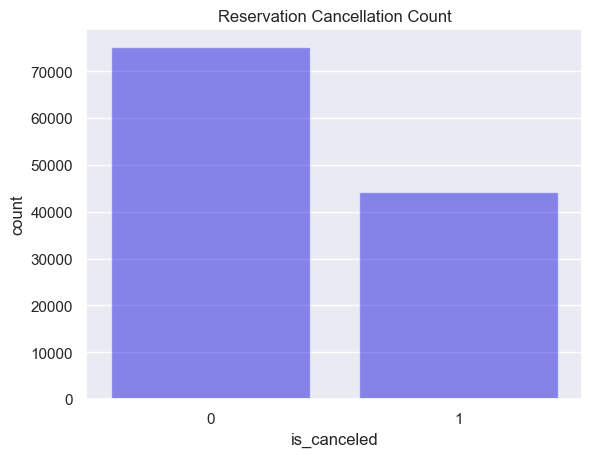

In [9]:
#df_hotels.is_canceled.value_counts(normalize=True).plot(kind='bar', title='reservation')
sns.countplot(data=df_hotels, x='is_canceled',color='blue', alpha=0.5)
plt.title('Reservation Cancellation Count')
plt.show()
#plt.plot(df_hotels.is_canceled.value_counts())

41.73
27.76
              cancellation rate (%)
hotel                              
Resort Hotel                  27.76
City Hotel                    41.73


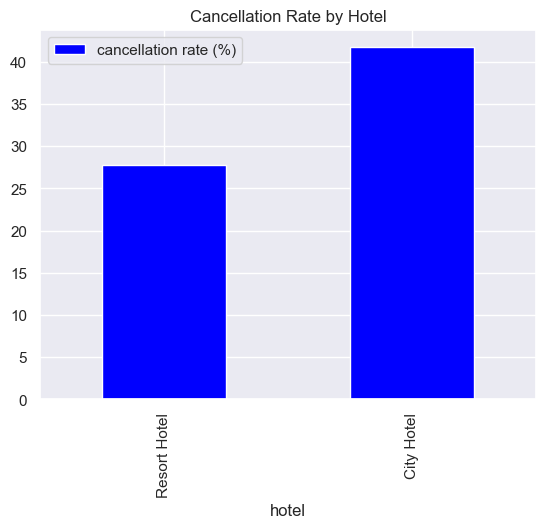

In [10]:
#a) For “City Hotel”, what is the percentage of canceled reservations?
#b) For “Resort Hotel”, what is the percentage of canceled reservations?
#c) What type of hotel that has the bigger percentage of canceled reservations?

print(round(100*(len(df_hotels[(df_hotels.hotel == 'City Hotel')&(df_hotels.is_canceled == 1)])/(len(df_hotels[df_hotels.hotel == 'City Hotel']))),2))
print(round(100*(len(df_hotels[(df_hotels.hotel == 'Resort Hotel')&(df_hotels.is_canceled == 1)])/(len(df_hotels[df_hotels.hotel == 'Resort Hotel']))),2))

def comparison(df):
    data = []
    for hotel in df.hotel.unique():
        data.append({
            'hotel': hotel,
            #'canceled': len(df[(df.hotel == hotel) & (df.is_canceled == 1)]),
            #'not canceled': len(df[(df.hotel == hotel) & (df.is_canceled == 0)]),
            #'total': len(df[df.hotel == hotel]),
            'cancellation rate (%)': round(100 * len(df[(df.hotel == hotel) & (df.is_canceled == 1)]) / len(df[df.hotel == hotel]), 2)
        }) 
    dfratehotel = pd.DataFrame(data).set_index('hotel')
    print(dfratehotel)
    dfratehotel.plot(kind='bar', title='Cancellation Rate by Hotel', color='blue')
    return plt.show()

comparison(df_hotels)

In [11]:
#Filter data so that it only displays the visitors 
#who don’t cancel the reservation and save the result in df_checkout variable!
df_checkout = df_hotels[df_hotels.is_canceled == 0]

df_checkout

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
#a) Show the number of reservations per month of arrival for each type of hotel!

df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

In [13]:
#b) Then in which month there are the most reservations in each type of hotel? 
# Make a conclusion whether the trend is the same in both types of hotels?

counts = df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique().reset_index(name='unique_id_count')
result = counts.loc[counts.groupby('hotel')['unique_id_count'].idxmax()]
print(result)

           hotel arrival_date_month  unique_id_count
1     City Hotel             August             5381
13  Resort Hotel             August             3257


In [14]:
#c) Do as point B but with the name of the month that has been mapped into months in numbers!
months_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(months_mapping)

df_checkout.groupby(['hotel','arrival_date_month_num'])['id'].nunique()

C:\Users\User\AppData\Local\Temp\ipykernel_27448\3342950591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(months_mapping)


hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10  

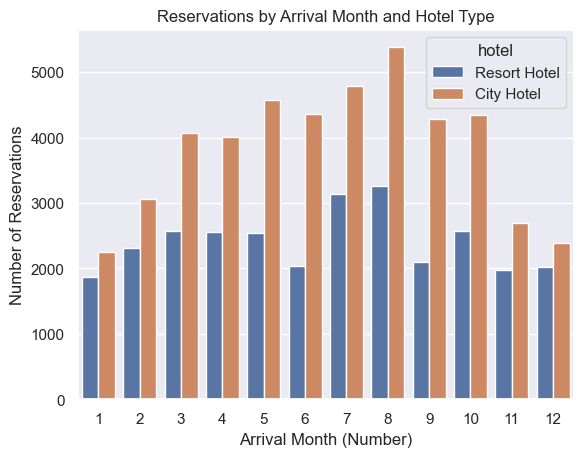

In [15]:
sns.countplot(data=df_checkout, x='arrival_date_month_num', hue='hotel')
plt.xlabel('Arrival Month (Number)')
plt.ylabel('Number of Reservations')
plt.title('Reservations by Arrival Month and Hotel Type')
plt.show()

In [16]:
#a) Create a new column named arrival_date which contains complete information about the year, month, and date of arrival!
#b) Change the column to datetime type!

df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype(str) + '-' + df_checkout['arrival_date_month_num'].astype(str).str.pad(2,fillchar='0') + '-' + df_checkout['arrival_date_day_of_month'].astype(str).str.pad(2,fillchar='0')
df_checkout['arrival_date'] 

C:\Users\User\AppData\Local\Temp\ipykernel_27448\1858368306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype(str) + '-' + df_checkout['arrival_date_month_num'].astype(str).str.pad(2,fillchar='0') + '-' + df_checkout['arrival_date_day_of_month'].astype(str).str.pad(2,fillchar='0')


0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_date, Length: 75166, dtype: object

In [17]:
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

C:\Users\User\AppData\Local\Temp\ipykernel_27448\2853533070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

In [18]:
#a) Daily reservation (df_daily_reservation)
#b) Average of daily reservation per week (df_avg_daily_reservation_per_week)

df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'daily_reservation'})
df_daily_reservation

,arrival_date,daily_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
...,...,...
788,2017-08-27,125
789,2017-08-28,147
790,2017-08-29,81
791,2017-08-30,62


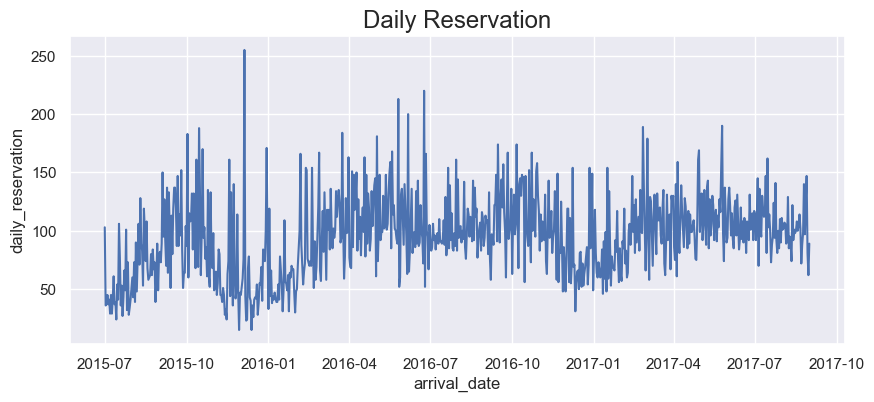

In [19]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

In [20]:
df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(),2)
df_avg_daily_reservation_per_week

,arrival_date,avg_daily_reservation_per_week
0,2015-07-05,51.60
1,2015-07-12,40.57
2,2015-07-19,53.86
3,2015-07-26,53.00
4,2015-08-02,47.14
...,...,...
109,2017-08-06,101.00
110,2017-08-13,98.00
111,2017-08-20,103.71
112,2017-08-27,103.14


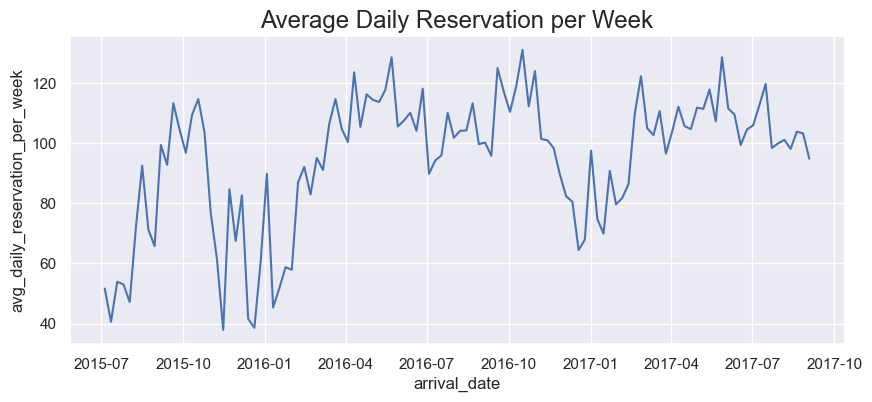

In [21]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week' )
plt.title('Average Daily Reservation per Week', fontsize='x-large')
plt.show()

In [22]:
#a) What is the average ADR (Average Daily Rate) based on hotel type and customer type?
#b) Which type of customer has the highest the average of ADR in each type of hotel?

round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)

hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64

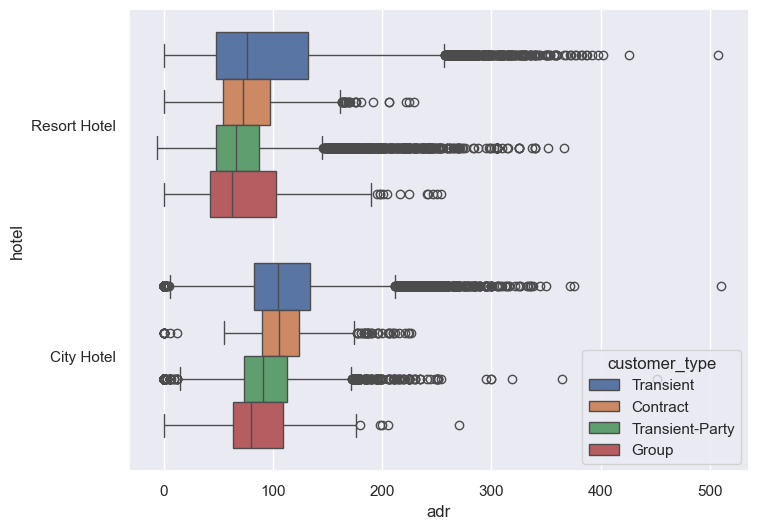

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

In [ ]:
#By using the ‘df_country’ dataframe which contains the country name and country code information, 
#show the 10 countries with the largest number of reservations!

df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
...,...,...,...,...,...,...
251,Wallis and Futuna,"""WF""","""WLF""","""876""","""-13.3""","""-176.2"""
252,Western Sahara,"""EH""","""ESH""","""732""","""24.5""","""-13"""
253,Yemen,"""YE""","""YEM""","""887""","""15""","""48"""
254,Zambia,"""ZM""","""ZMB""","""894""","""-15""","""30"""


In [28]:
df_country['code'] = df_country['Alpha-3 code'].str.replace('"', '').str.strip()
df_country['code'] 

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: code, Length: 256, dtype: object

In [29]:
df_merged = pd.merge(df_checkout[['id','country']], df_country[['Country','code']], left_on='country', right_on='code', how='left')
df_merged

,id,country,Country,code
0,0,PRT,Portugal,PRT
1,1,PRT,Portugal,PRT
2,2,GBR,United Kingdom,GBR
3,3,GBR,United Kingdom,GBR
4,4,GBR,United Kingdom,GBR
...,...,...,...,...
75712,119385,BEL,Belgium,BEL
75713,119386,FRA,France,FRA
75714,119387,DEU,Germany,DEU
75715,119388,GBR,United Kingdom,GBR


In [44]:
df_merged_graph = df_merged.Country.value_counts().head(10)
df_merged_graph

Portugal          21071
United Kingdom     9676
France             8481
Spain              6391
Germany            6069
Ireland            2543
Italy              2433
Belgium            1868
Netherlands        1717
United States      1596
Name: Country, dtype: int64

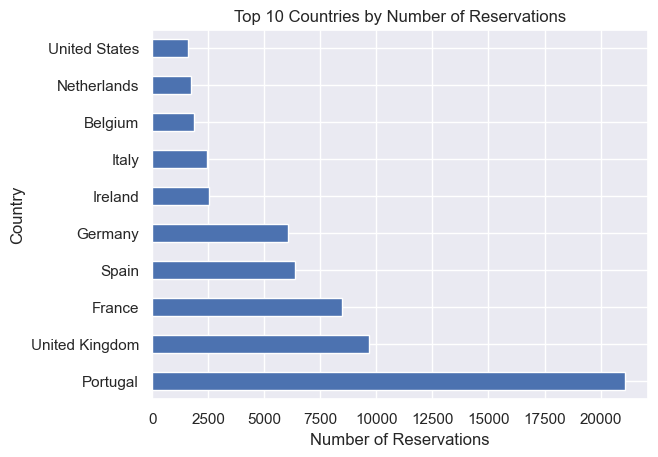

In [45]:
df_merged_graph.plot.barh(title='Top 10 Countries by Number of Reservations')
plt.xlabel('Number of Reservations')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Reservations')
plt.show()

In [51]:
#a) How many average guests stay for each reservation?
#b) Based on the dataset, what is the highest number of guests? 
#Also show the reservation data row that has the highest number of guests.

df_checkout['total_guest'] = df_checkout['adults'] + df_checkout['children'] + df_checkout['babies']
print(round(df_checkout['total_guest'].mean(),0))
print(df_checkout['total_guest'].max())
df_checkout[df_checkout['total_guest'] == df_checkout['total_guest'].max()].transpose()

2.0
12.0


C:\Users\User\AppData\Local\Temp\ipykernel_27448\1685148325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout['adults'] + df_checkout['children'] + df_checkout['babies']


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
